In [1]:
%cd '/content/drive/MyDrive/Final_Sem_Project'

/content/drive/MyDrive/Final_Sem_Project


In [2]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.svm import NuSVR, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from Utils.utils import printLosses, generatePredictionPlot

In [3]:
def seed_everything(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
seed_everything()

In [4]:
data = pd.read_csv("data.csv")

In [5]:
data = shuffle(data)

In [6]:
data.columns = ['height', 'radius', 'freq', 'S11']

In [7]:
Y = data['S11']
X = data.drop('S11', axis = 1)

In [8]:
print(X.shape)
print(Y.shape)

(48400, 3)
(48400,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42, shuffle = True)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36300, 3)
(36300,)
(12100, 3)
(12100,)


In [11]:
nusvr = NuSVR(C = 1.0, nu = 0.1)
nusvr.fit(X_train, y_train)

NuSVR(nu=0.1)

In [12]:
y_pred = nusvr.predict(X_test)

In [13]:
y_pred

array([-6.76117539, -7.79844038, -4.11524486, ..., -7.65306363,
       -4.34948378, -6.28651449])

In [14]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.060774569282678104
Mean Squared Error on test set is :  18.24838078552615
Mean Absolute Error on test set is :  3.4564190868460027
Root Mean Squared Error on test set is :  4.271812353735373
Mean Absolute Percentage Error on test set is :  1.2649235605116436
Root Mean Squared Percentage Error on test set is :  15.53206199845465


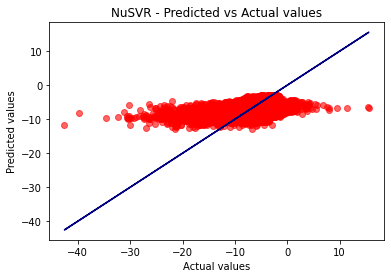

In [15]:
generatePredictionPlot(y_pred, y_test, "NuSVR")

In [16]:
svr = SVR()

In [17]:
svr.fit(X_train, y_train)

SVR()

In [18]:
y_pred = svr.predict(X_test)

In [19]:
printLosses(y_pred, y_test)

R2 Score on test set is :  0.20647355535004308
Mean Squared Error on test set is :  15.417568830411454
Mean Absolute Error on test set is :  2.3615254023741046
Root Mean Squared Error on test set is :  3.9265212122706603
Mean Absolute Percentage Error on test set is :  0.8448793691111294
Root Mean Squared Percentage Error on test set is :  17.623099996451757


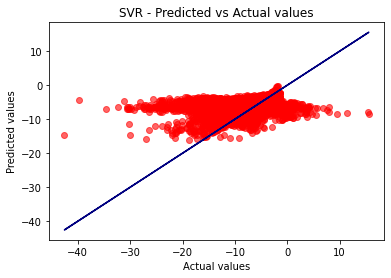

In [20]:
generatePredictionPlot(y_pred, y_test, "SVR")